In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn import svm

import matplotlib.pyplot as plt
from six import StringIO 
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/boston_house_project.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.rename({'MEDV':'PRICE'},axis=1,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Preprocessing

In [5]:
df.drop(['CHAS'],axis=1,inplace=True)
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


# Exploratory Data Analysis

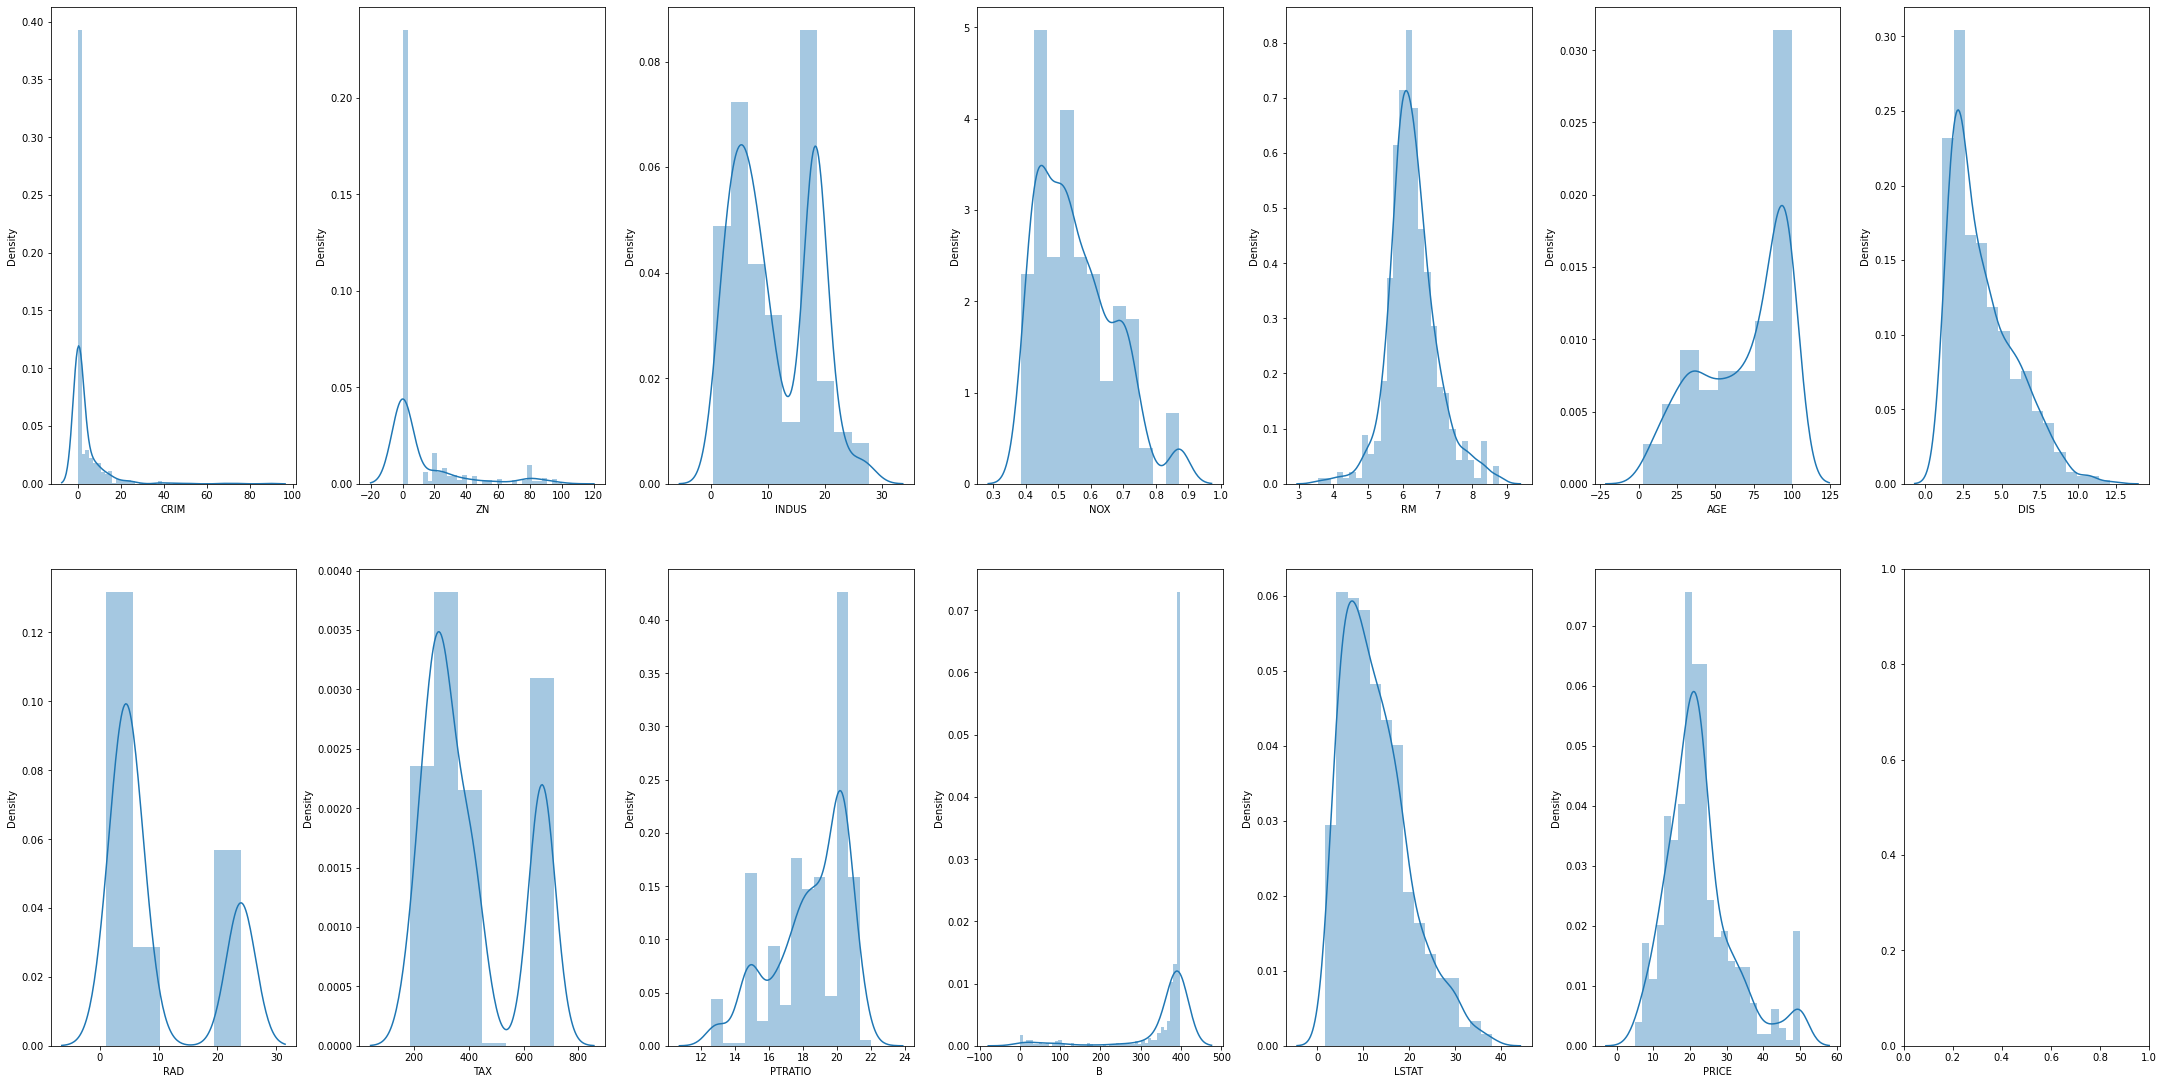

In [9]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Min-Max Normalization

In [10]:
cols = ['CRIM', 'ZN', 'TAX','B']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

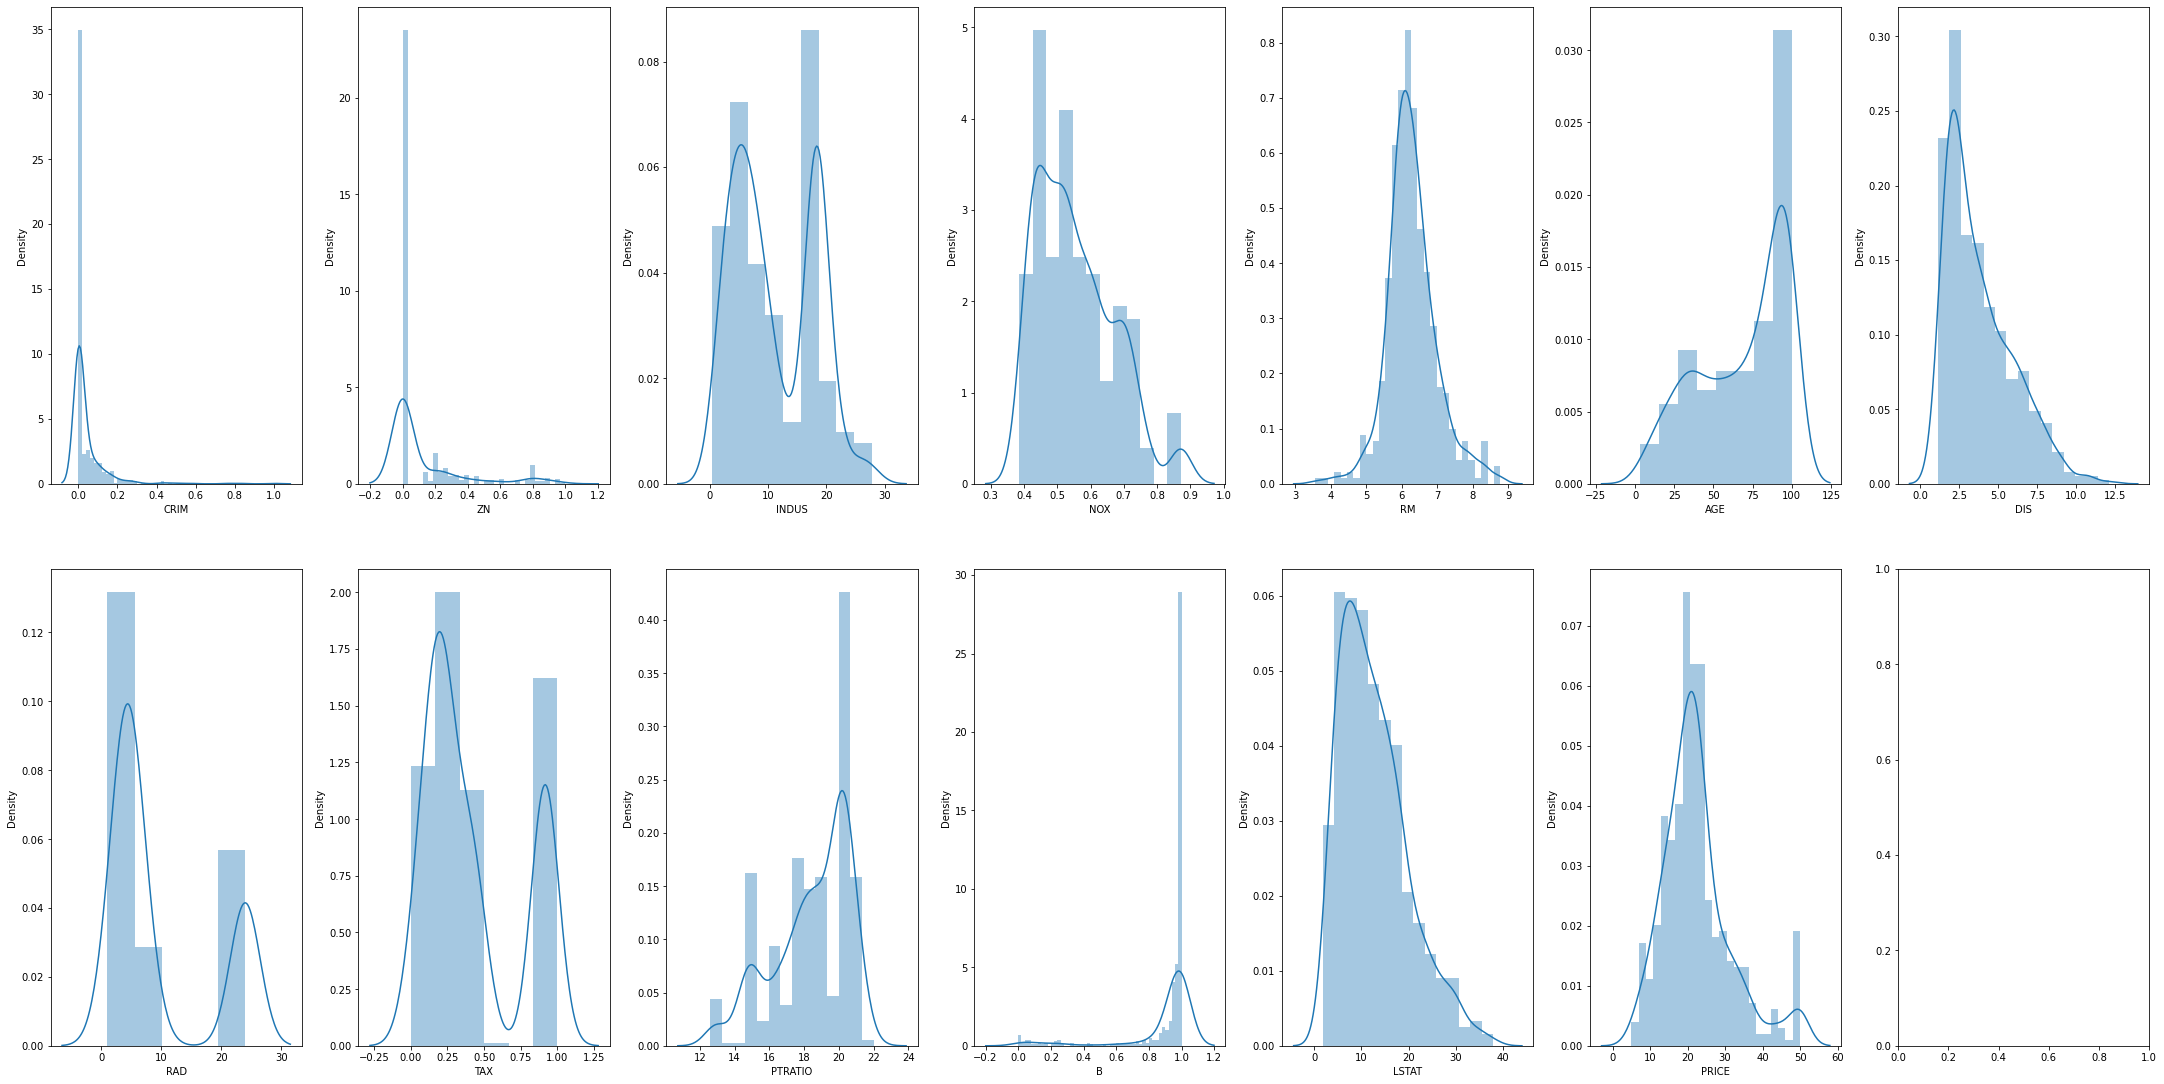

In [11]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Standardization

In [12]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [13]:
for col in cols:
    df[col] = scaled_cols[col]

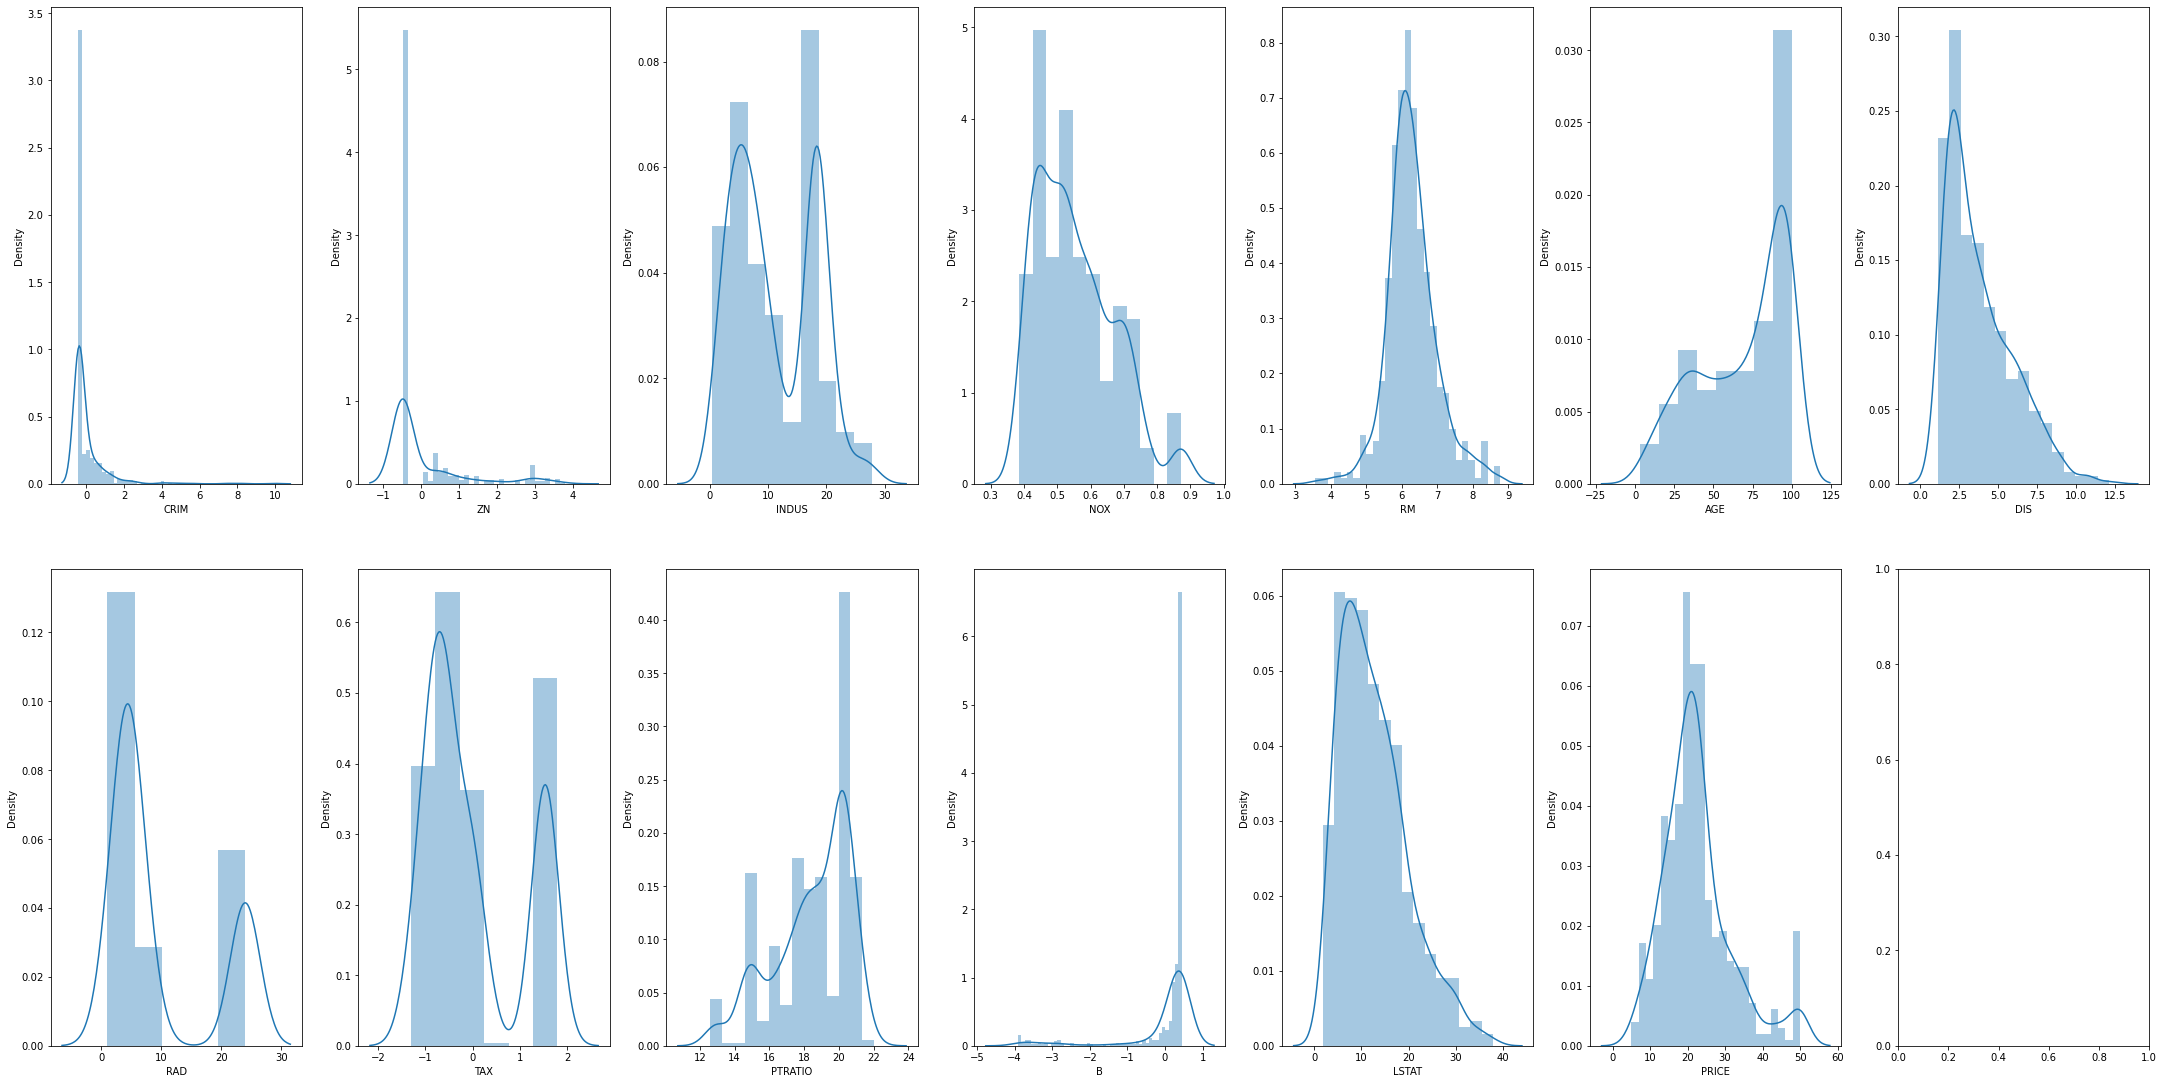

In [14]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Correlation Matrix

<AxesSubplot:>

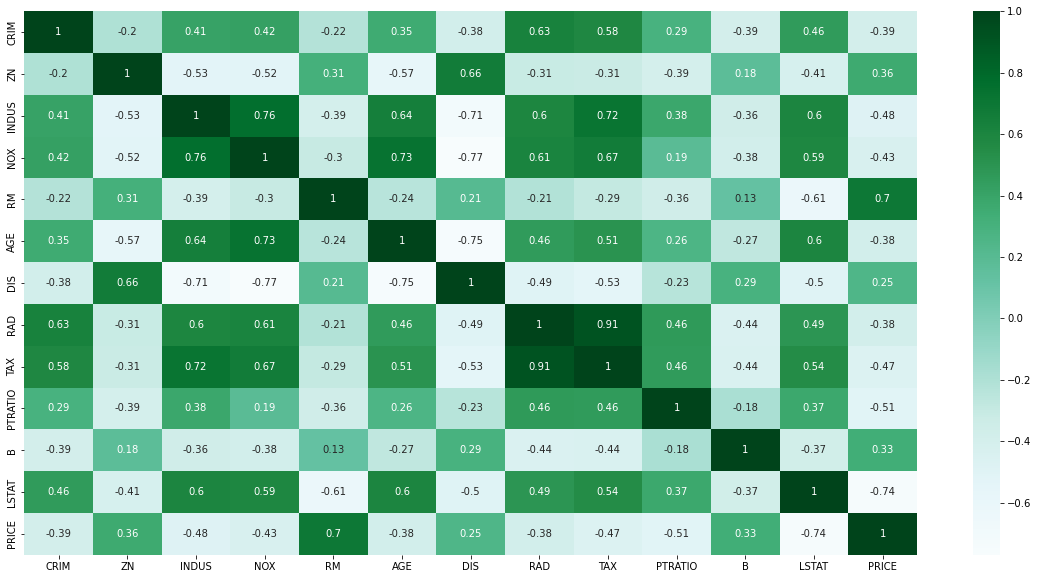

In [47]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='BuGn')

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

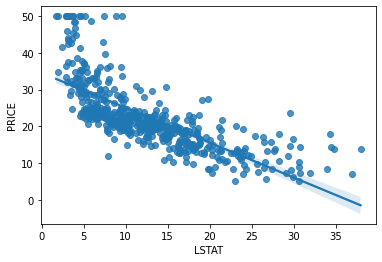

In [16]:
sns.regplot(y=df['PRICE'], x=df['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

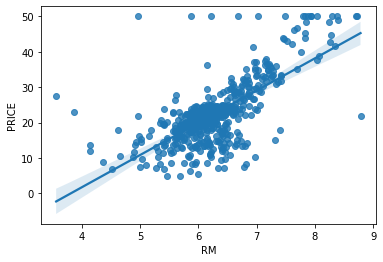

In [17]:
sns.regplot(y=df['PRICE'], x=df['RM'])

# Split Input 

In [18]:
X = df.drop(columns=['PRICE', 'RAD'], axis=1)
y = df['PRICE']

# Algorithm Hyperparameters

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

LINEAR REGRESSION

Model Report
MSE: 24.441579938995826
CV Score: 35.28042610881825


<AxesSubplot:title={'center':'Model Coefficients'}>

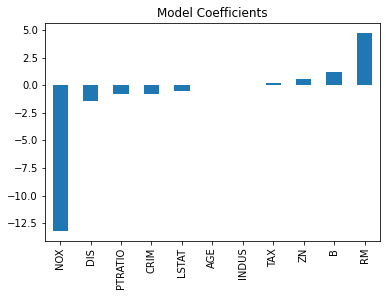

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

DecisionTreeRegressor

Model Report
MSE: 20.936141732283463
CV Score: 44.58157212191808


<AxesSubplot:title={'center':'Feature Importance'}>

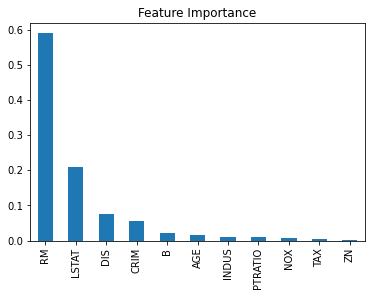

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

RandomForestRegressor

Model Report
MSE: 9.35849698425197
CV Score: 21.863661076276443


<AxesSubplot:title={'center':'Feature Importance'}>

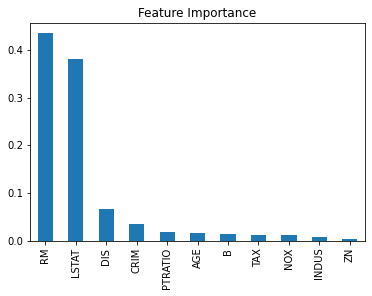

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(['PRICE'],axis=1)
y=df['PRICE']

In [27]:
x.shape

(506, 12)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
model.fit(x,y)

LinearRegression()

In [30]:
train_score=round(model.score(x_train,y_train)*100,2)
print("train_score: ",train_score)

train_score:  72.33


In [31]:
y_pred=model.predict(x_test)

In [32]:
model.score(x_test,y_test)

0.7845722511157798

In [33]:
round(model.score(x_test,y_test)*100,2)

78.46

# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
# Model prediction on train data
y_pred = reg.predict(x_train)

In [36]:
x= df.iloc[:,[-1,5,10,4,9]]
y= df.iloc[:,[-1]]

reg.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [39]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [40]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
train_score=round(reg.score(x_train,y_train)*100,2)
print("train_score: ",train_score)

train_score:  98.45


In [42]:
y_pred=reg.predict(x_test)

In [43]:
reg.score(x_train,y_train)

0.9844771441370523

# Conclusions

The peroject question for this study is to study how well house prices can be predicted by using Linear Regression and Random forest regression. 
In this study we have found that the Random forest regression algorithm performs better at predicting house prices than the Linear Regression algorithm. 
However, there is still a difference between the actual prices in our testing data and the prices predicted by the Random forest regression algorithm. 

